# [ContactPose: A Dataset of Grasps with Object Contact and Hand Pose](https://contactpose.cc.gatech.edu)

In [1]:
# Copyright (c) Facebook, Inc. and its affiliates.
# Code by Samarth Brahmbhatt
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import numpy as np

from utilities.dataset import ContactPose
import utilities.misc as mutils

In [2]:
cp = ContactPose(28, 'use', 'bowl')
print(cp)

Participant 28, intent use, object bowl
558 frames
Cameras present: kinect2_left kinect2_middle kinect2_right
Hands present: left right


In [3]:
# read full images
frame_idx = 7
color_im_filenames = cp.image_filenames('color', frame_idx)
depth_im_filenames = cp.image_filenames('depth', frame_idx)
print(color_im_filenames)
color_ims = {n: cv2.imread(f, -1) for n,f in color_im_filenames.items()}
depth_ims = {n: cv2.imread(f, -1) for n,f in depth_im_filenames.items()}

{'kinect2_left': 'data/contactpose_data/full28_use/bowl/images_full/kinect2_left/color/frame007.png', 'kinect2_middle': 'data/contactpose_data/full28_use/bowl/images_full/kinect2_middle/color/frame007.png', 'kinect2_right': 'data/contactpose_data/full28_use/bowl/images_full/kinect2_right/color/frame007.png'}


Let's show the color and depth images with annotations projected on them

<IPython.core.display.Javascript object>


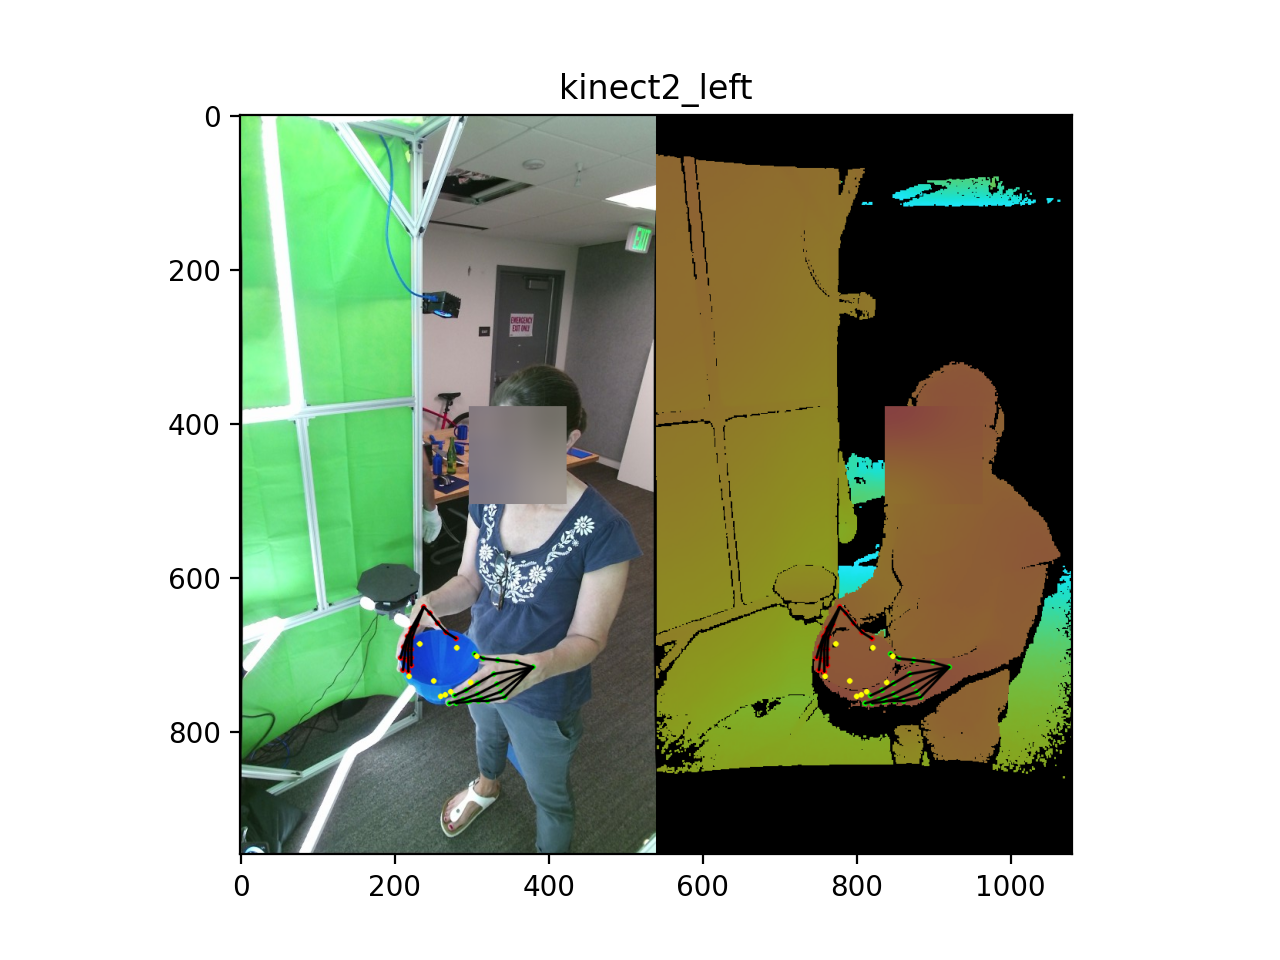

<IPython.core.display.Javascript object>


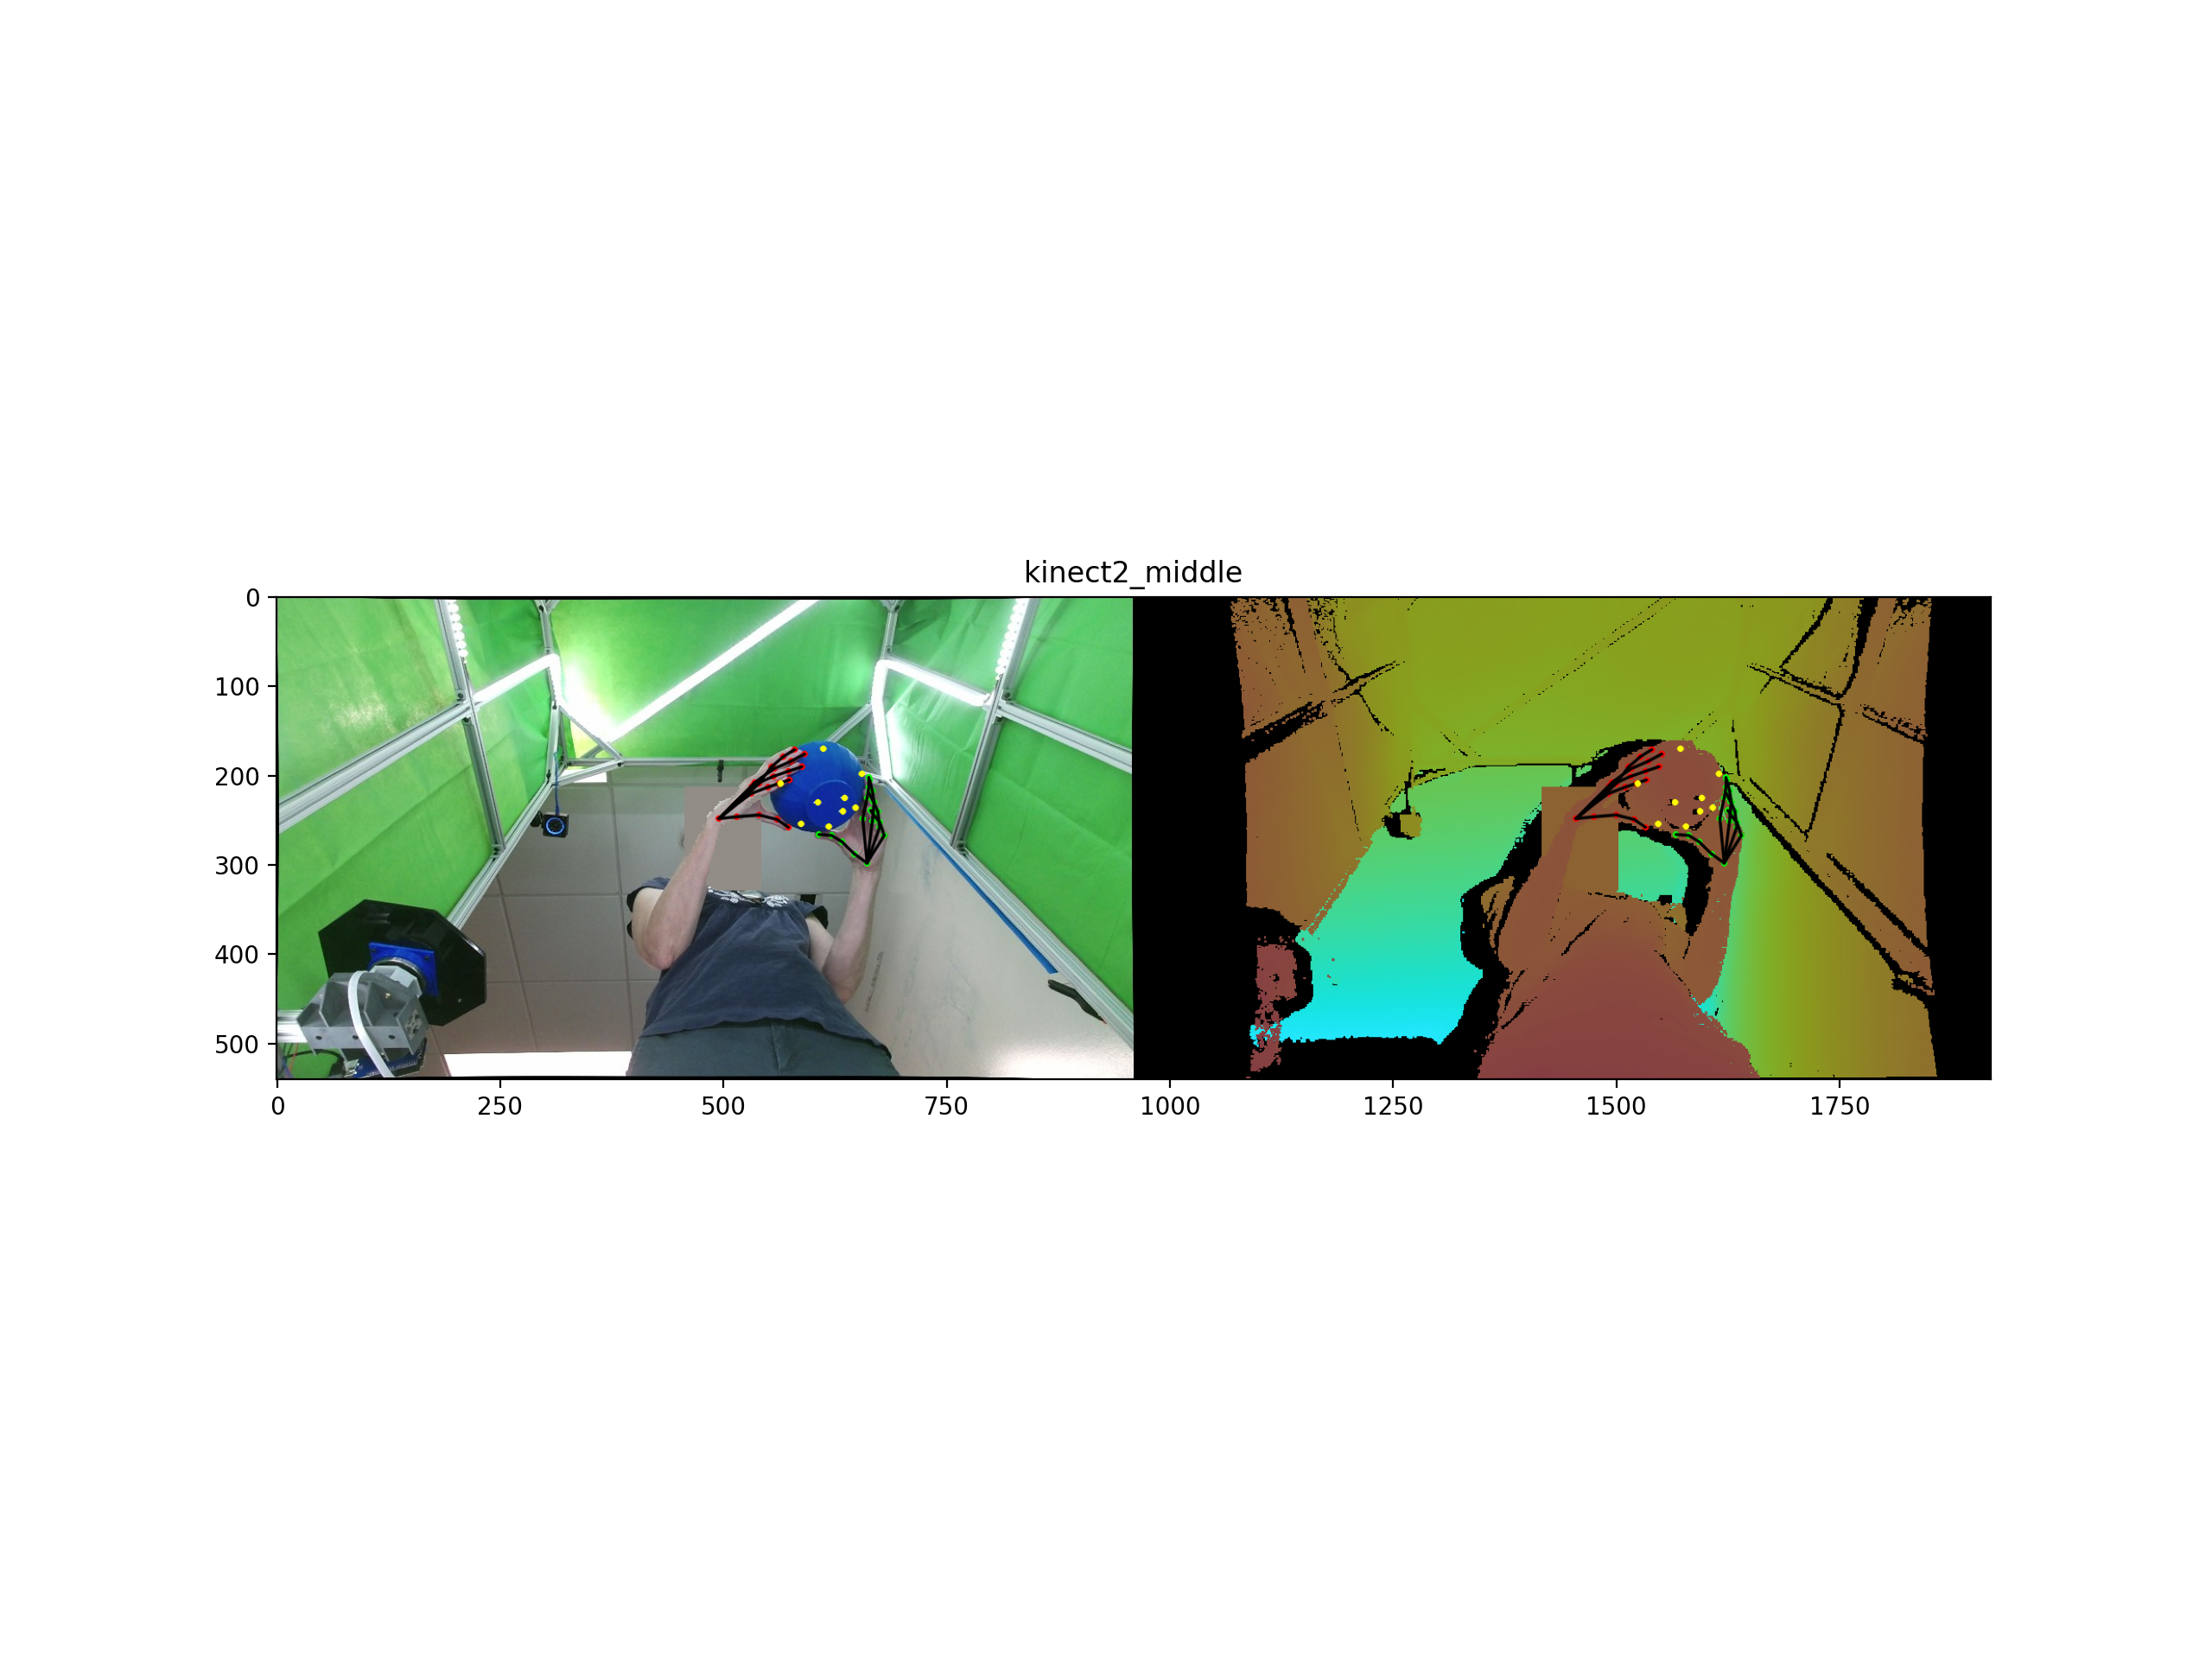

<IPython.core.display.Javascript object>


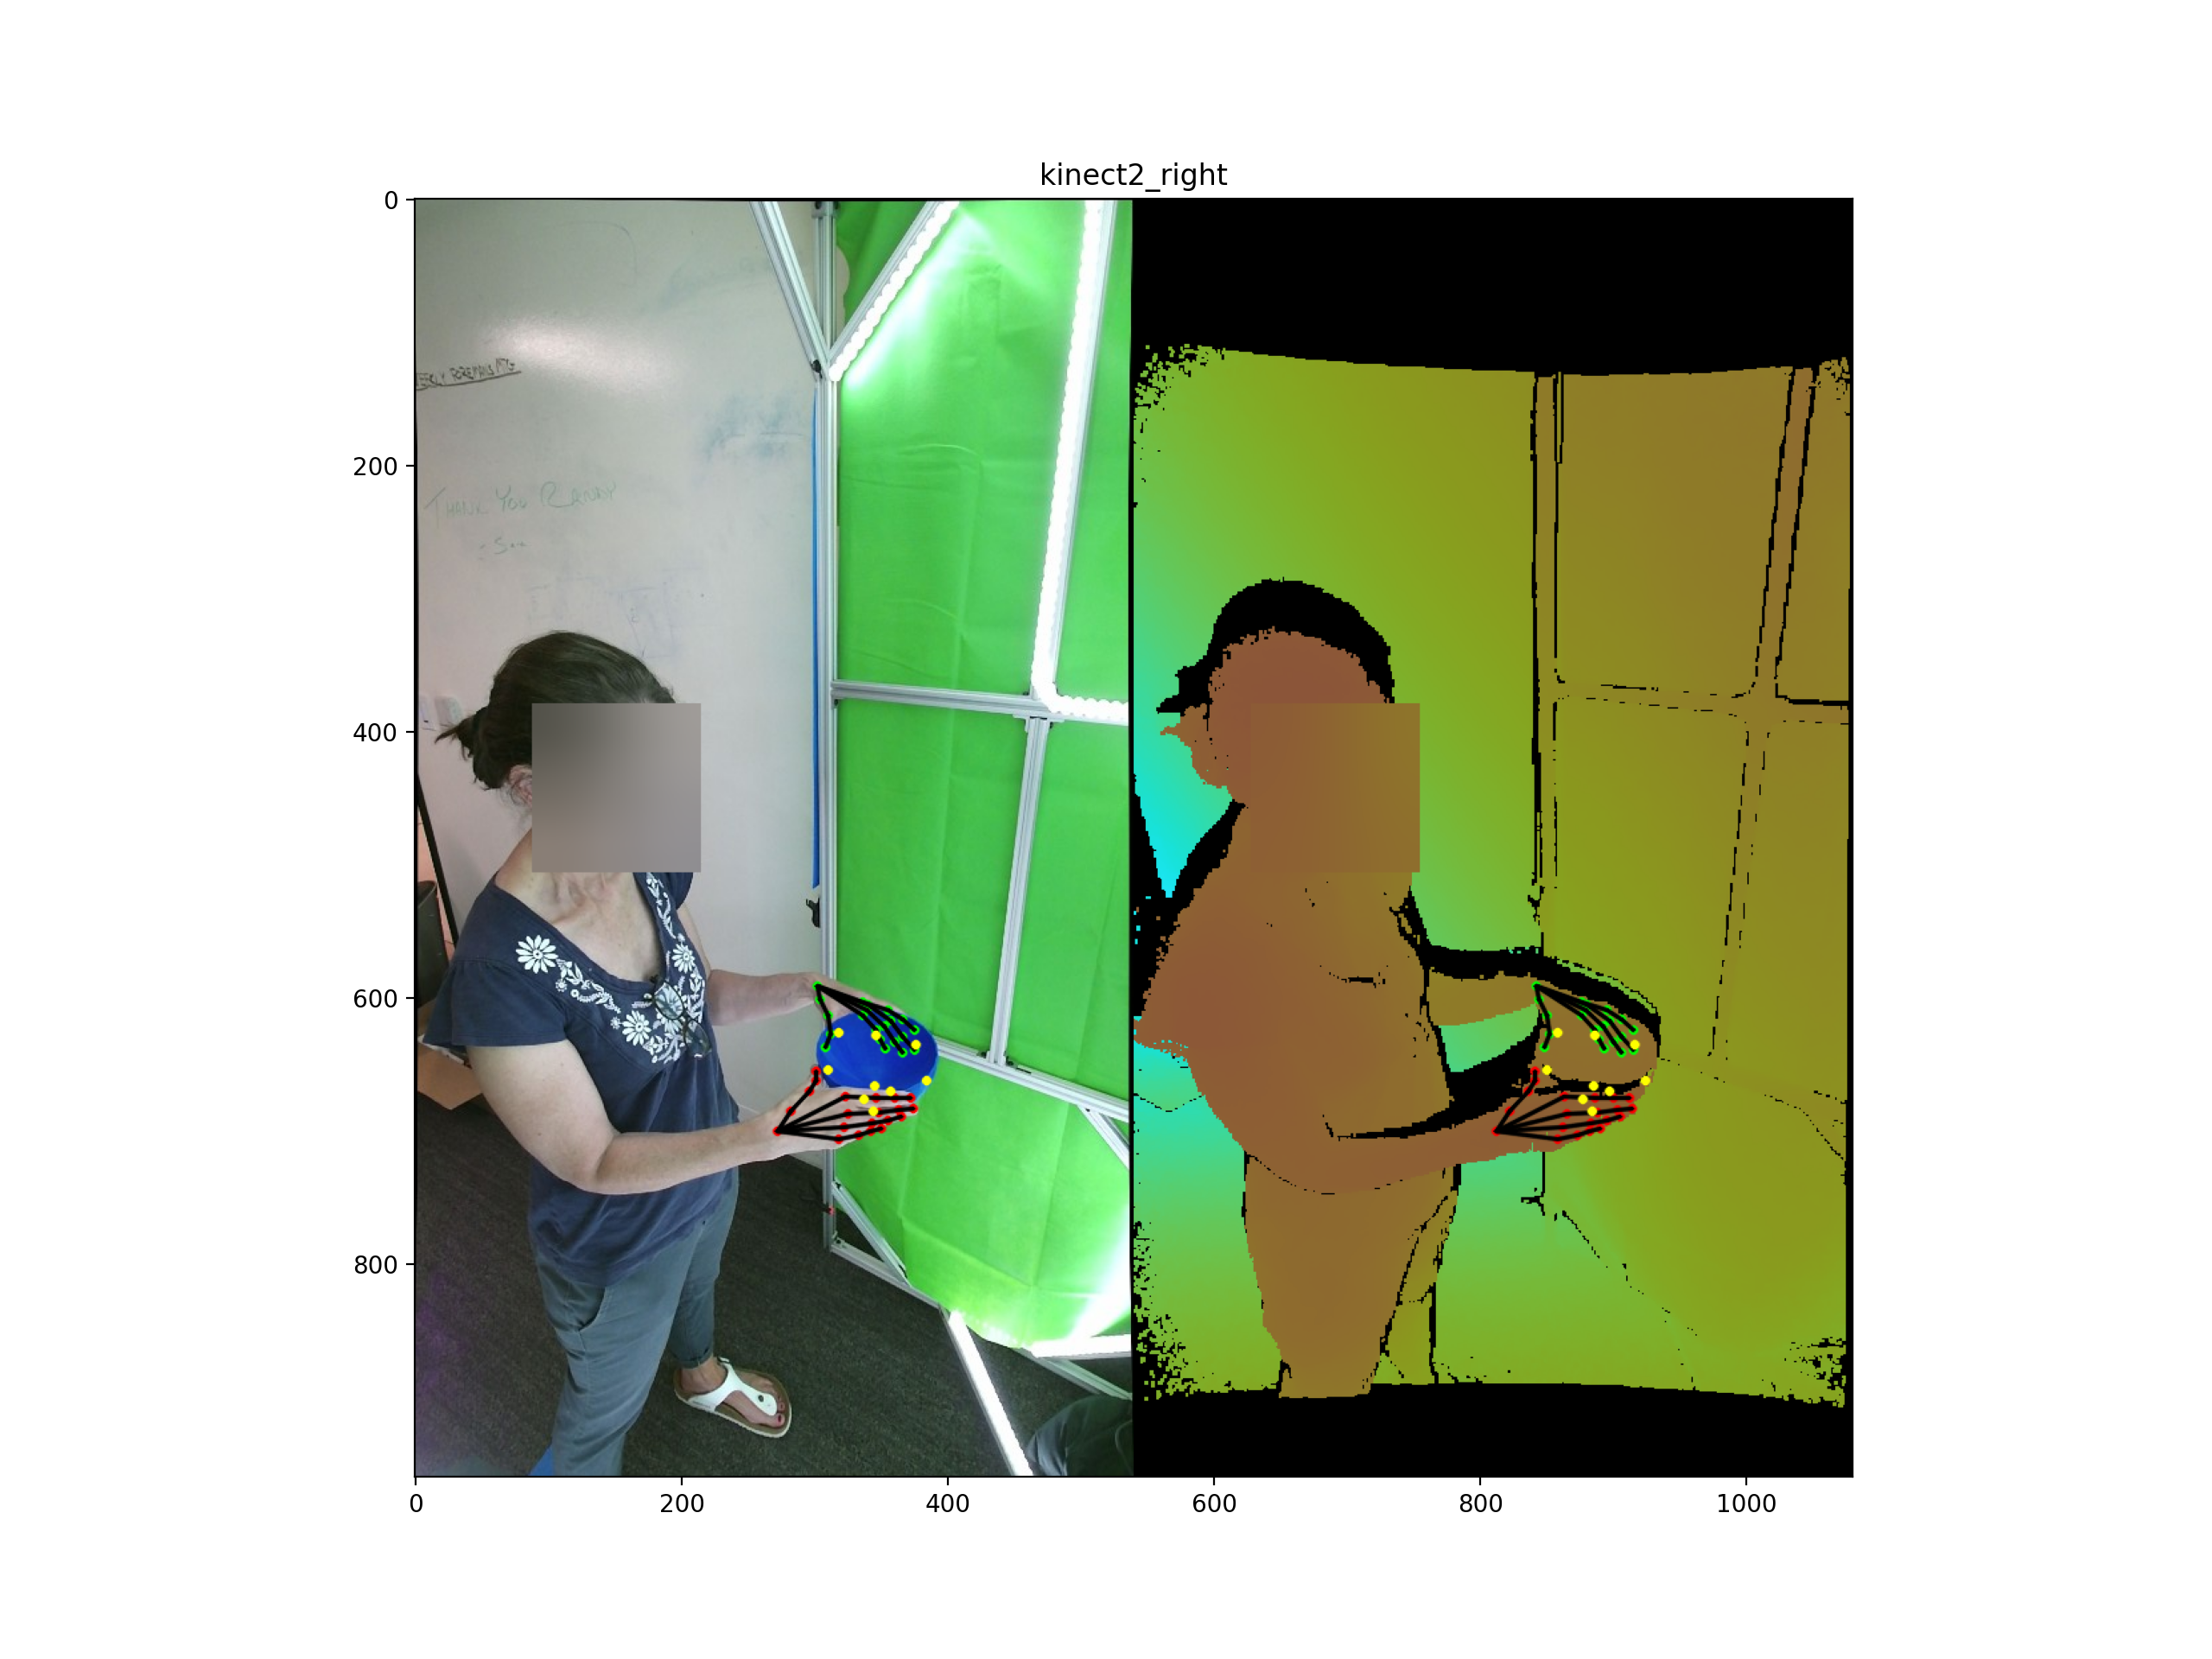

In [4]:
# Full images
for camera_name in color_ims:
    color_im = color_ims[camera_name]
    depth_im = depth_ims[camera_name]
    
    # get projected hand joints and object markers
    joints = cp.projected_hand_joints(camera_name, frame_idx)
    markers = cp.projected_object_markers(camera_name, frame_idx)
    
    # draw on image
    color_im = mutils.draw_hands(color_im, joints)
    color_im = mutils.draw_object_markers(color_im, markers)
    depth_im = mutils.draw_hands(depth_im, joints)
    depth_im = mutils.draw_object_markers(depth_im, markers)
    
    # show
    plt.figure()
    plt.title(camera_name)
    plt.imshow(np.hstack((color_im, depth_im))[:, :, ::-1])  # BGR -> RGB
plt.show()

<IPython.core.display.Javascript object>


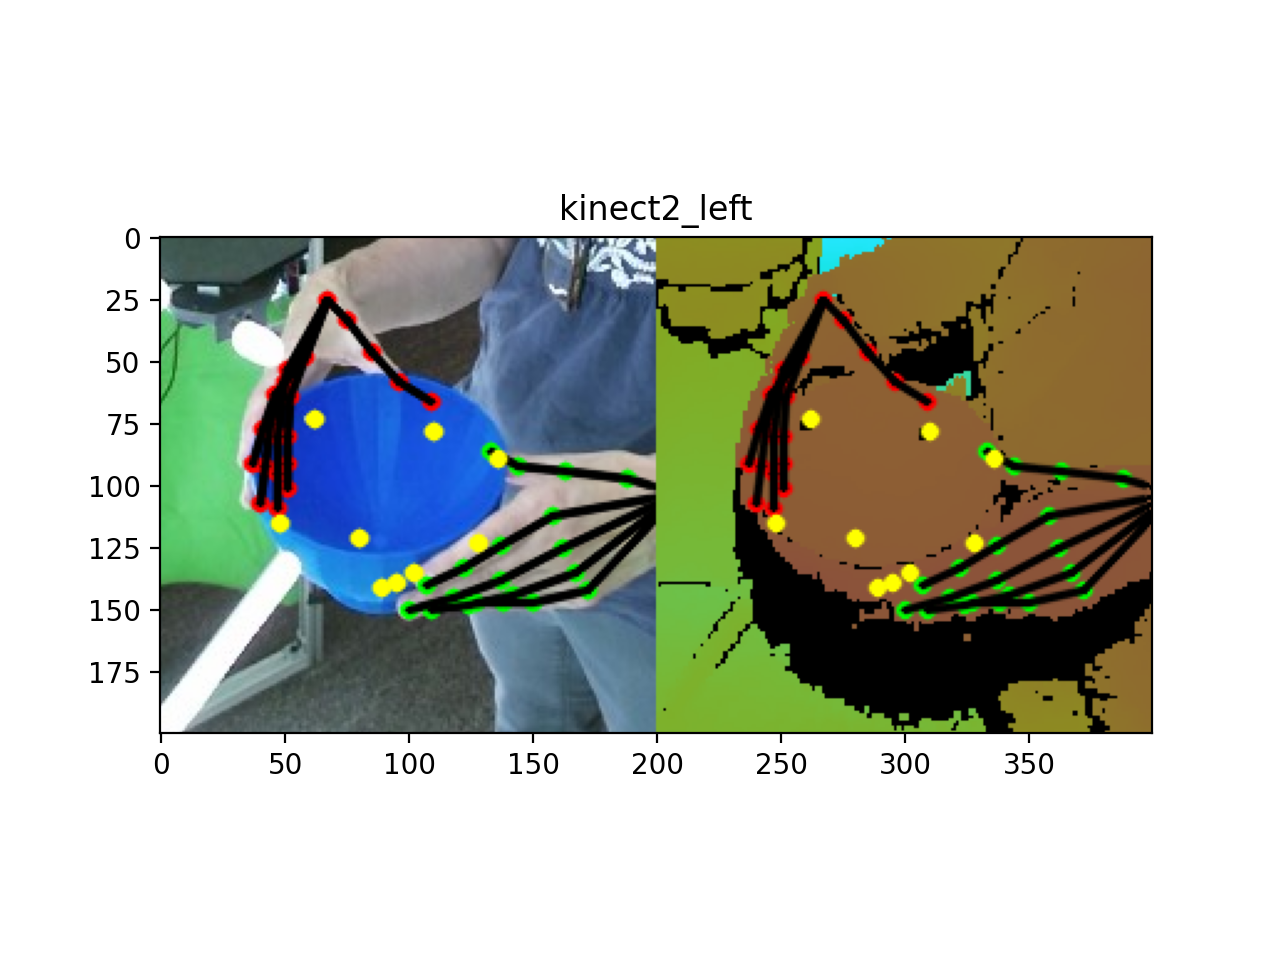

<IPython.core.display.Javascript object>


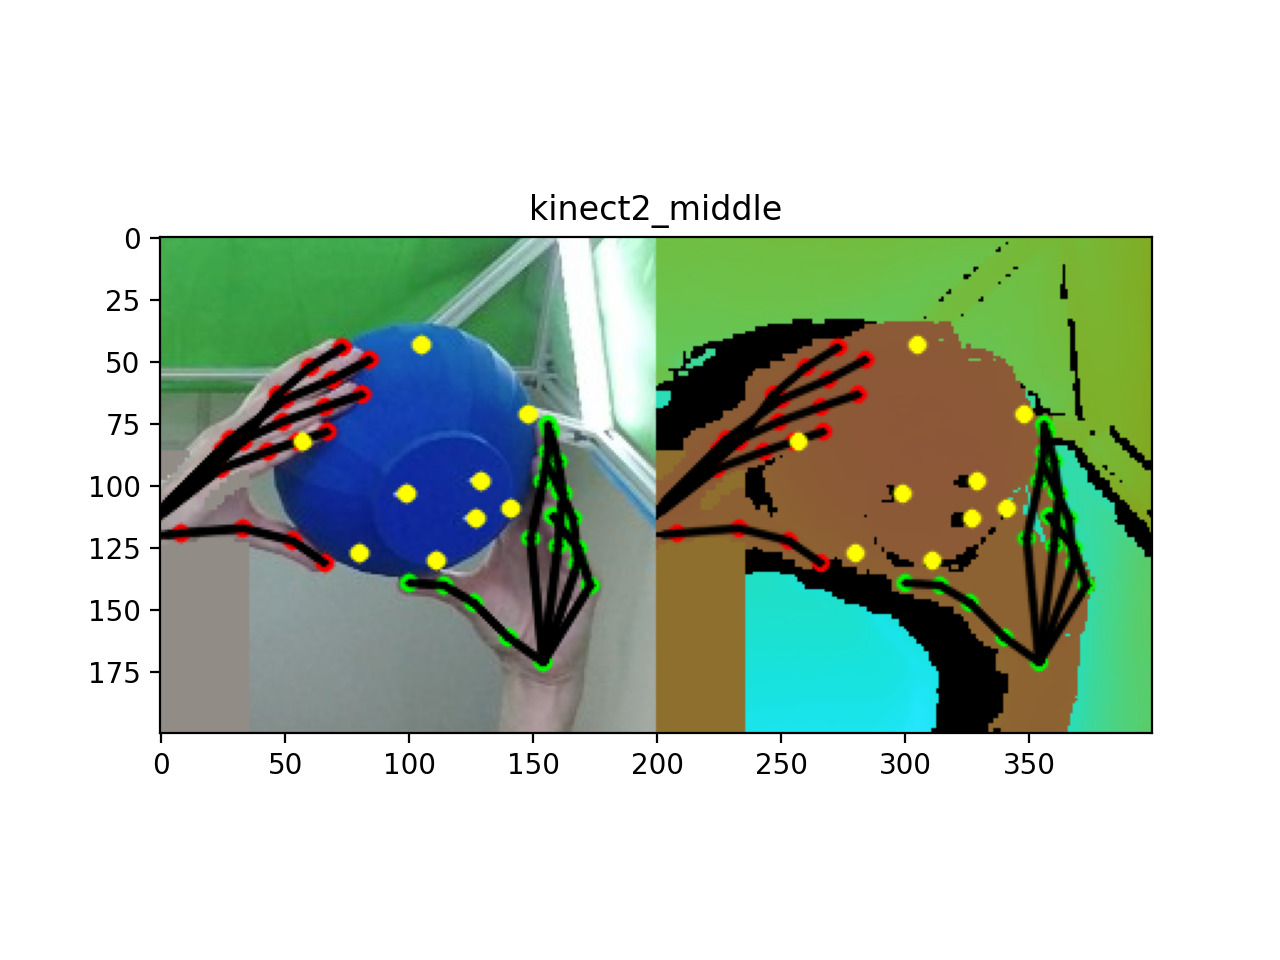

<IPython.core.display.Javascript object>


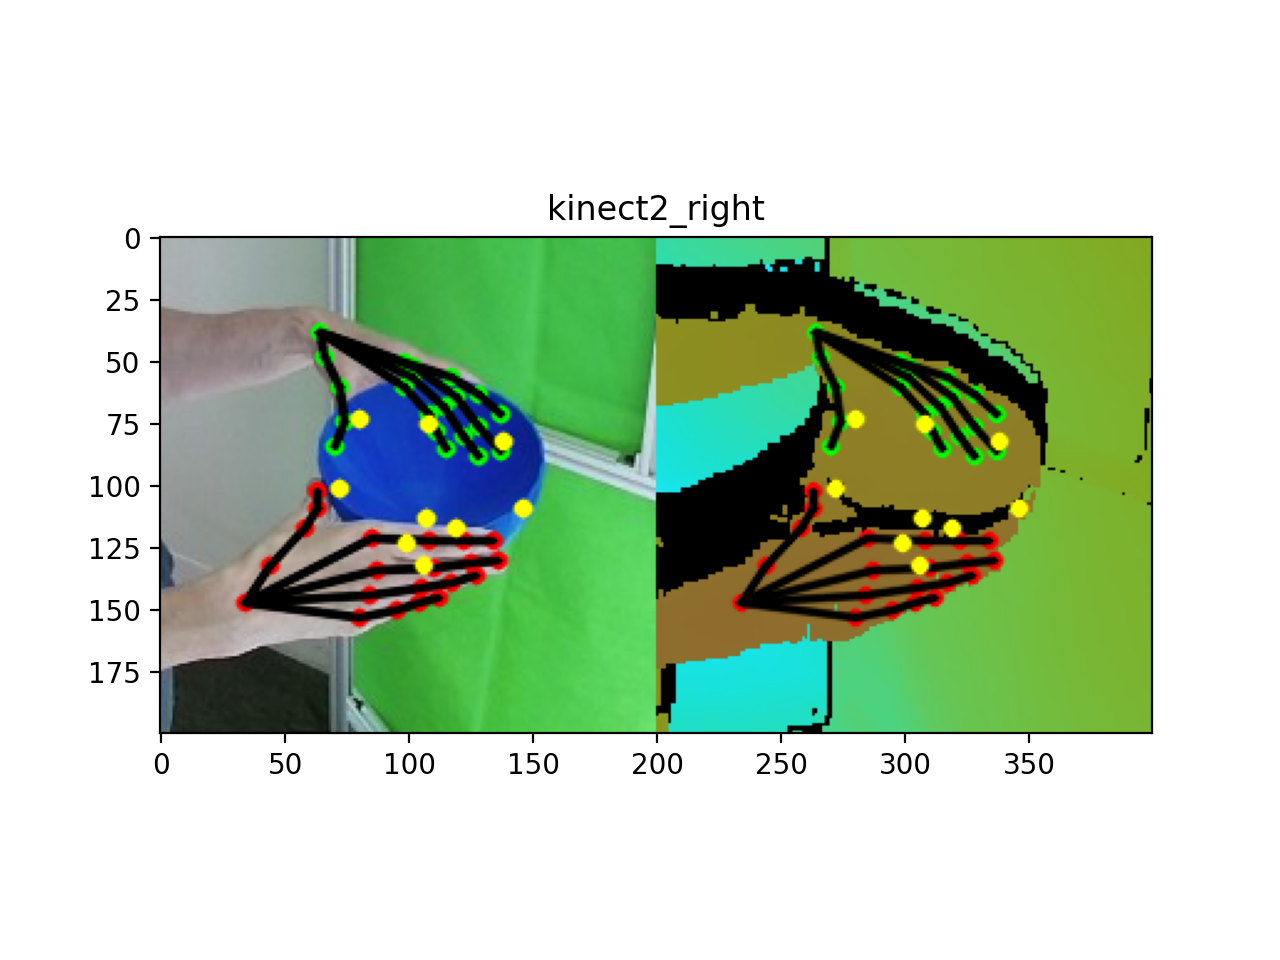

In [5]:
# Images cropped around the hand-object
crop_size = 200
for camera_name in color_ims:
    color_im = color_ims[camera_name]
    depth_im = depth_ims[camera_name]
    
    # get projected hand joints and object markers
    joints = cp.projected_hand_joints(camera_name, frame_idx)
    markers = cp.projected_object_markers(camera_name, frame_idx)
    
    # crop the images centered at the hand center
    color_im, crop_topleft_pos = mutils.crop_image(color_im, joints, crop_size)
    depth_im, crop_topleft_pos = mutils.crop_image(depth_im, joints, crop_size)
    
    # draw on image
    color_im = mutils.draw_hands(color_im, joints, offset=crop_topleft_pos)
    color_im = mutils.draw_object_markers(color_im, markers, offset=crop_topleft_pos)
    depth_im = mutils.draw_hands(depth_im, joints, offset=crop_topleft_pos)
    depth_im = mutils.draw_object_markers(depth_im, markers, offset=crop_topleft_pos)
    
    # show
    plt.figure()
    plt.title(camera_name)
    plt.imshow(np.hstack((color_im, depth_im))[:, :, ::-1])  # BGR -> RGB
plt.show()

The `ContactPose` class also provides access to other grasp information:

In [6]:
# contact map filename
cp.contactmap_filename

'data/contactpose_data/full28_use/bowl/bowl.ply'

In [7]:
# annotation (camera pose, intrinsics, hand pose, object poses) JSON
cp.annotation_filename

'data/contactpose_data/full28_use/bowl/annotations.json'

In [8]:
# 3D hand joints (21 per hand) w.r.t. object
for hand_name, j in zip(('Left', 'Right'), cp.hand_joints()):
    print('##### Hand: {:s}'.format(hand_name))
    if j is not None:
        print(j.shape)
    else:
        print('Absent')

##### Hand: Left
(21, 3)
##### Hand: Right
(21, 3)


In [9]:
# camera intrinsics
for camera_name in cp.valid_cameras:
    print('##### Camera: {:s}'.format(camera_name))
    print(cp.K(camera_name))

##### Camera: kinect2_left
[[520.61316972   0.         477.19634221]
 [  0.         521.31364024 275.50412321]
 [  0.           0.           1.        ]]
##### Camera: kinect2_middle
[[527.13175215   0.         491.36222792]
 [  0.         527.67039201 272.61027383]
 [  0.           0.           1.        ]]
##### Camera: kinect2_right
[[533.85587261   0.         473.4060398 ]
 [  0.         533.90600017 270.14347071]
 [  0.           0.           1.        ]]


In [10]:
# object pose w.r.t. camera
for camera_name in cp.valid_cameras:
    print('##### Camera: {:s}'.format(camera_name))
    print(cp.object_pose(camera_name, frame_idx))

##### Camera: kinect2_left
[[-2.71359029e-01  1.55128768e-01 -9.49894385e-01  3.97591722e-01]
 [ 4.98501005e-01  8.66888719e-01 -8.35219021e-04  5.03252349e-03]
 [ 8.23323160e-01 -4.73749949e-01 -3.12569928e-01  7.68790495e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
##### Camera: kinect2_middle
[[ 0.99691813  0.03368243  0.07085005 -0.20304911]
 [-0.06238947  0.88791841  0.45575043  0.04632313]
 [-0.04755828 -0.45876617  0.88728339  0.68383976]
 [ 0.          0.          0.          1.        ]]
##### Camera: kinect2_right
[[-0.41041973 -0.18327112  0.89329018 -0.31929689]
 [-0.5487652   0.83200096 -0.0814319   0.13472569]
 [-0.72829417 -0.52362782 -0.44204242  0.91070686]
 [ 0.          0.          0.          1.        ]]


In [11]:
# MANO parameters - pose PCA components 'pose', shape PCA components 'betas', root transform 'hTm'
for hand_name, p in zip(('Left', 'Right'), cp.mano_params):
    print('##### Hand: {:s}'.format(hand_name))
    if p is None:
        print('Absent')
    else:
        print('pose: size {:d}'.format(len(p['pose'])))
        print('betas: size {:d}'.format(len(p['betas'])))
        print('hTm: ')
        print(p['hTm'])

##### Hand: Left
pose: size 18
betas: size 10
hTm: 
[[ 0.05926333 -0.81459427  0.5769957  -0.08123753]
 [ 0.99316661 -0.01009995 -0.11626728 -0.04901997]
 [ 0.10053829  0.57994324  0.80842927  0.05650253]
 [ 0.          0.          0.          1.        ]]
##### Hand: Right
pose: size 18
betas: size 10
hTm: 
[[ 0.71834334  0.64813983 -0.25277977  0.08916297]
 [-0.68126778  0.58177453 -0.44431138  0.01427355]
 [-0.14091507  0.49137883  0.85947065  0.07289167]
 [ 0.          0.          0.          1.        ]]


In [12]:
# MANO meshes - vertices, face indices, and 21 joints
for hand_name, mesh in zip(('Left', 'Right'), cp.mano_meshes()):
    if mesh is None:
        continue
    print('### Hand {:s}'.format(hand_name))
    print('vertices: ', mesh['vertices'].shape)
    print('face indices: ', mesh['faces'].shape)
    print('joints: ', mesh['joints'].shape)

### Hand Left
vertices:  (778, 3)
face indices:  (1538, 3)
joints:  (21, 3)
### Hand Right
vertices:  (778, 3)
face indices:  (1538, 3)
joints:  (21, 3)


## Utilities
`utilities/misc.py` has useful functions

In [13]:
frame_idx = 77
camera_name = 'kinect2_middle'
oX  = cp.hand_joints()[1]                                  # 3D right hand joints
P   = cp.P(camera_name, frame_idx)                         # 3x4 projection matrix
x   = mutils.project(P, oX)                                # project 3D joints to 2D
xx  = cp.projected_hand_joints(camera_name, frame_idx)[1]  # compare against
np.mean(np.linalg.norm(x-xx, axis=1))                      # should be small

0.0